In [1]:
import pandas as pd
import numpy as np
import matplotlib
import re

In [2]:
df = pd.read_csv('review_total_all.csv', encoding='cp949')

In [3]:
df.head()

,Unnamed: 0,index,title,text,id,date,like,rate,show
0,0,0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021.11.01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)
1,1,1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021.11.01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)
2,2,2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021.11.01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)
3,3,3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021.11.01,0,4.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)
4,4,4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021.11.01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154103 entries, 0 to 154102
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  154103 non-null  int64  
 1   index       154103 non-null  int64  
 2   title       154087 non-null  object 
 3   text        154103 non-null  object 
 4   id          154097 non-null  object 
 5   date        154103 non-null  object 
 6   like        154103 non-null  int64  
 7   rate        154103 non-null  float64
 8   show        154103 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 10.6+ MB


## TO DO
- [x] 인덱스 열 삭제
- [x] 결측치 처리
- [x] 데이터셋 조인
- [x] 문자열 처리
- [x] 공연 제목(show 열) -> show 열 값 수정 및 genre 열 추가

#### 인덱스 열 삭제

In [5]:
df = df.iloc[:, 2:]

#### 결측치 처리

In [6]:
df[df['title'].isnull()]

,title,text,id,date,like,rate,show
3982,NaN,착한마녀와 나쁜 마녀가 친구가 되어 화합하는 내용이 좋았고\n화려하고 예쁨보다 못생...,gun3***,2021.06.21,0,5.0,뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked)
70391,NaN,처음 봤지만 그것도 중계로 본 거지만 본진극이 되어버릴 정도로 재밌고 슬프고 넘버도...,hgu1***,2021.07.26,0,5.0,뮤지컬 〈블랙메리포핀스〉 온라인 스트리밍
74898,NaN,한줄평 유쾌한데 슬픈 헤드윅이었다,ggagg***,2021.10.07,0,5.0,뮤지컬 〈헤드윅〉
96791,NaN,빠른 시일 내에 재연 들고 와주세요… 현고흐 너무 사랑했고 잊지 못할 거예요ㅠㅠ,hgu1***,2021.10.06,0,5.0,"뮤지컬 〈아르토, 고흐〉"
96792,NaN,인생은 질문을 불태우기 위해,hgu1***,2021.10.06,0,5.0,"뮤지컬 〈아르토, 고흐〉"
97591,NaN,언제나 최고이애,hgu1***,2021.09.27,0,5.0,"뮤지컬 〈아르토, 고흐〉"
98042,NaN,이 날 진심 대레전!!! 안재영 배우님 배우님은 천재세요,hgu1***,2021.09.14,0,5.0,"뮤지컬 〈아르토, 고흐〉"
98043,NaN,잊지 못할 날…,hgu1***,2021.09.14,0,5.0,"뮤지컬 〈아르토, 고흐〉"
98329,NaN,스콜데이 또 주세요……,hgu1***,2021.09.08,0,5.0,"뮤지컬 〈아르토, 고흐〉"
99032,NaN,아고박! 아고박!,hgu1***,2021.08.29,0,5.0,"뮤지컬 〈아르토, 고흐〉"


In [7]:
df[df['id'].isnull()]

,title,text,id,date,like,rate,show
15189,너무 강력추천,"손승연배우님과 정선아배우님의 위키드를 보고왔습니다. 연기력, 가창력 뿐만아니라 연줄...",NaN,2021.03.19,1,5.0,뮤지컬 〈위키드〉 - 서울 (Musical Wicked)
22426,편곡이 아쉽습니다,동화같지만 현실적인 이야기,NaN,2021.10.04,0,4.0,뮤지컬 〈개와 고양이의 시간〉
61508,호불호가 많이 갈리네...,난 좋았는데.....괜찮았는데....목소리톤이 허스키해서 ....갈릴것 같긴 하더라...,NaN,2020.11.25,2,4.0,뮤지컬 〈그날들〉
61519,좋았어요...다만,정학과 무영이 왜 그녀를 좋아하게 됏는지...무영이가 목숨을 바칠만큼..... 스토...,NaN,2020.11.24,2,5.0,뮤지컬 〈그날들〉
86061,오랫만의 신한 판 스퀘어,오랫만에 신한판 스퀘어에 다녀왓네요 작년에 타작품으로 주 1회 이상은 갔는데 오랫만...,NaN,2020.11.23,0,5.0,뮤지컬 〈에어포트 베이비〉
112133,뮤지컬 박열 최고 입니다.,조훈 배우님 허혜진 배우님 권용국 배우님 회차로 보고 왔는데\n세분 정말 딕션은 물...,NaN,2021.07.18,0,5.0,뮤지컬 〈박열〉


제목이 없어도 내용에 영향을 미치지 않으므로 '[]'로 결측치 대체<br>
id는 향후 분석에 중요하게 다뤄질 요소이므로 id가 결측치인 행 삭제

In [8]:
df['title'].fillna('[]', inplace=True)
df.drop(df[df['id'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   154097 non-null  object 
 1   text    154097 non-null  object 
 2   id      154097 non-null  object 
 3   date    154097 non-null  object 
 4   like    154097 non-null  int64  
 5   rate    154097 non-null  float64
 6   show    154097 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.2+ MB


#### 데이터셋 조인

In [10]:
df_toJoin = pd.read_csv('info_total_all.csv', encoding = 'cp949')
df_toJoin.head()

,Unnamed: 0,0,1,2,3
0,0,뮤지컬 〈미오 프라텔로〉,장소드림아트센터 1관,2020.09.29 ~2021.01.31,"['이승현', '김대현', '최석진', '김순택', '최호승', '백기범', '정성..."
1,1,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),장소LG아트센터,2021.09.07 ~2022.02.27,"['조형균', '박강현', '시우민', '최재림', '강홍석', '김선영', '박혜..."
2,2,뮤지컬 〈명성황후〉 25주년 기념 공연,장소예술의전당 오페라극장,2021.01.19 ~2021.03.07,"['김소현', '신영숙', '강필석', '손준호', '박민성', '윤형렬', '이창..."
3,3,뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권,장소\n,2021.01.15 ~2021.01.17,[]
4,4,뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked),장소부산 드림씨어터,2021.05.20 ~2021.06.27,"['옥주현', '손승연', '정선아', '나하나', '서경수', '진태화', '남경..."


In [11]:
#인덱스 열 제거
df_toJoin = df_toJoin.iloc[:, 1:]

#컬럼 이름 수정
df_toJoin.columns = ['show', 'place', 'season', 'cast']

#출연진 열 문자열 처리
cast = []
for i in range(len(df_toJoin)):
    c = df_toJoin['cast'][i].strip('[]').replace('\'', '').replace(' ','')
    cast.append(c)
df_toJoin['cast'] = cast

#공연장소 열 문자열 처리
place = []
for i in range(len(df_toJoin)):
    p = df_toJoin['place'][i][2:]
    place.append(p)
df_toJoin['place'] = place

#결측값은 []
for i in range(len(df_toJoin)):
    if((df_toJoin['place'][i]=='')|(df_toJoin['place'][i]=='\n')):
        df_toJoin['place'][i]='[]'
    if(df_toJoin['cast'][i]==''):
        df_toJoin['cast'][i]='[]'

In [12]:
df_toJoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   show    77 non-null     object
 1   place   77 non-null     object
 2   season  77 non-null     object
 3   cast    77 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [13]:
show = df_toJoin.show.unique()
len(show)

75

공연명이 중복되는 행이 있음

In [14]:
df_find = df_toJoin.groupby('show').count()
df_find[df_find['place']==2]

,place,season,cast
show,,,
뮤지컬 〈맨오브라만차〉,2,2,2
뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권,2,2,2


In [15]:
idx = df_toJoin['show'].isin(['뮤지컬 〈맨오브라만차〉', '뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권'])
df_toJoin.loc[idx]

,show,place,season,cast
3,뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권,[],2021.01.15 ~2021.01.17,[]
29,뮤지컬 〈맨오브라만차〉,충무아트센터 대극장,2021.03.24 ~2021.05.16,"류정한,조승우,윤공주,김지현,최수진,이훈진,정원영,서영주,김대종"
64,뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권,[],2021.01.08 ~2021.01.10,[]
76,뮤지컬 〈맨오브라만차〉,샤롯데씨어터,2020.12.18 ~2021.03.01,"류정한,조승우,홍광호,윤공주,김지현,최수진,이훈진,정원영,서영주,김대종,박인배,조성..."


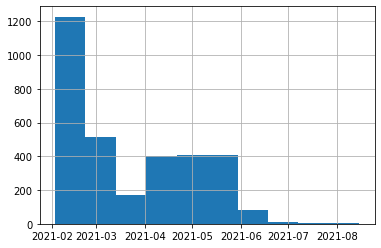

In [16]:
#date열 datetime으로 데이터 타입 변경
df['date'] = pd.to_datetime(df['date'], format='%Y.%m.%d')

manOfLaMancha = df[df['show']=='뮤지컬 〈맨오브라만차〉']
manOfLaMancha['date'].hist()

In [17]:
df_toJoin = df_toJoin.drop([3, 76])

뮤지컬<젠틀맨스가이드>는 공연기간만 다르기 때문에 문제가 되지 않지만, 뮤지컬<맨오브라만차>는 공연기간, 공연장소, 출연진 모두에 차이가 있다. <맨오브라만차>의 후기 작성 일자를 확인하였을 때 2월의 후기가 가장 많고 이는 2020년 12월에 개봉한 뮤지컬에 대한 후기일 것이다. 따라서 76번 행을 남기는 것이 적합하다. <젠틀맨스가이드>는 3번행을 남겼다.

In [18]:
df_total = pd.merge(df, df_toJoin, left_on='show', right_on='show', how='left')
df_total.head()

,title,text,id,date,like,rate,show,place,season,cast
0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우..."
1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우..."
2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우..."
3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021-11-01,0,4.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우..."
4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우..."


In [19]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154097 entries, 0 to 154096
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   title   154097 non-null  object        
 1   text    154097 non-null  object        
 2   id      154097 non-null  object        
 3   date    154097 non-null  datetime64[ns]
 4   like    154097 non-null  int64         
 5   rate    154097 non-null  float64       
 6   show    154097 non-null  object        
 7   place   154097 non-null  object        
 8   season  154097 non-null  object        
 9   cast    154097 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 12.9+ MB


#### 공연명 문자열 처리

In [20]:
original = df_total.show.unique()
original

array(['뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)', '뮤지컬 〈명성황후〉 25주년 기념 공연',
       '뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권',
       '뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked)', '뮤지컬 〈아이위시〉',
       '뮤지컬 드라큘라 (Dracula：The Musical)',
       '뮤지컬 〈위키드〉 - 서울 (Musical Wicked)', '뮤지컬 〈검은 사제들〉',
       '뮤지컬 〈1976 할란카운티〉', '뮤지컬 〈스프링 어웨이크닝〉', '뮤지컬 〈개와 고양이의 시간〉', '명동로망스',
       '2021 뮤지컬 〈비틀쥬스〉', '뮤지컬 〈노트르담 드 파리〉 프렌치 오리지널 내한 (12/18~)',
       '뮤지컬 〈몬테크리스토〉 10주년 기념공연', '뮤지컬 〈라 레볼뤼시옹〉', '뮤지컬 〈시카고〉',
       '뮤지컬 〈메리셸리〉', '2021 뮤지컬 〈광화문 연가〉', '뮤지컬 〈빌리 엘리어트〉',
       '뮤지컬〈우주대스타〉 앵콜', '뮤지컬 〈아가사 AGATHA〉', '창작가무극 〈나빌레라〉',
       '2021 웰컴대학로-웰컴씨어터 ‘ 뮤지컬 〈해적〉 ’', '뮤지컬 〈우주대스타〉', '뮤지컬 〈베르나르다 알바〉',
       '뮤지컬 〈맨오브라만차〉', '뮤지컬 〈홀연했던 사나이〉', '뮤지컬 〈브라더스 까라마조프〉',
       '뮤지컬 〈마리 앙투아네트〉', '뮤지컬 〈그날들〉', '뮤지컬 〈인사이드 윌리엄〉',
       '뮤지컬 〈어쩌면 해피엔딩〉 2021', '뮤지컬 〈레드북〉', '뮤지컬 〈블랙메리포핀스〉 온라인 스트리밍',
       '뮤지컬 〈쓰릴 미〉', '음악극 〈세자전〉', '뮤지컬 〈헤드윅〉', '뮤지컬 〈젠틀맨스가이드：사랑과 살인편〉',
       '뮤지컬 〈나와 나타샤와 흰 당나귀〉', '뮤지컬 〈엑스칼리버〉', '뮤지컬 블루레인（BLUE RAIN

In [21]:
show_toJoin = pd.DataFrame()
show_toJoin['original'] = original

In [47]:
#'장르 <공연명>'의 형태가 대부분이므로 아래와 같이 처리
show = []
genre = []
for i in range(len(show_toJoin)):
    g = show_toJoin['original'][i].split('〈')[0].replace(' ','')
    temp = show_toJoin['original'][i].replace(g, '')
    temp = re.sub('[0-9]','',temp)
    s = re.search('〈.+〉', temp)
    #괄호가 없는 경우
    if(s==None):
        show.append('[]')
        genre.append('[]')
    else:
        s = s.group().strip('〈〉')
        show.append(s)
        genre.append(g)
show_toJoin['show']=show
show_toJoin['genre']=genre

In [48]:
pd.set_option('display.max_rows', None)
show_toJoin

,original,show,genre
0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬
1,뮤지컬 〈명성황후〉 25주년 기념 공연,명성황후,뮤지컬
2,뮤지컬〈젠틀맨스가이드：사랑과 살인편〉 온라인 생중계 - 온라인 관람권,젠틀맨스가이드：사랑과 살인편,뮤지컬
3,뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked),위키드,뮤지컬
4,뮤지컬 〈아이위시〉,아이위시,뮤지컬
5,뮤지컬 드라큘라 (Dracula：The Musical),[],[]
6,뮤지컬 〈위키드〉 - 서울 (Musical Wicked),위키드,뮤지컬
7,뮤지컬 〈검은 사제들〉,검은 사제들,뮤지컬
8,뮤지컬 〈1976 할란카운티〉,할란카운티,뮤지컬
9,뮤지컬 〈스프링 어웨이크닝〉,스프링 어웨이크닝,뮤지컬


In [49]:
#처리 못한 값 확인 및 수정
show_toJoin['show'][5] = '드라큘라'
show_toJoin['genre'][5] = '뮤지컬'
show_toJoin['show'][11] = '명동로망스'
show_toJoin['genre'][11] = '뮤지컬'
show_toJoin['genre'][12] = '뮤지컬'
show_toJoin['genre'][18] = '뮤지컬'
show_toJoin['genre'][23] = '뮤지컬'
show_toJoin['show'][41] = '블루레인'
show_toJoin['genre'][41] = '뮤지컬'
show_toJoin['genre'][53] = '뮤지컬'
show_toJoin['genre'][64] = '뮤지컬'
show_toJoin['show'][66] = '멸화군'
show_toJoin['genre'][66] = '뮤지컬'

In [51]:
#df_total과 조인
df_total = pd.merge(df_total, show_toJoin, left_on='show', right_on='original', how='left')
df_total.head()

,title,text,id,date,like,rate,show_x,place,season,cast,original,show_y,genre
0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬
1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬
2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬
3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021-11-01,0,4.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬
4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021-11-01,0,5.0,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),하데스타운,뮤지컬


In [52]:
df_total.drop(['show_x', 'original'], axis=1, inplace = True)
df_total.rename(columns={'show_y':'show'}, inplace = True)

In [55]:
#최종 저장 데이터프레임
df_total.head()

,title,text,id,date,like,rate,place,season,cast,show,genre
0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021-11-01,0,4.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬


In [57]:
#파일저장명: review_total_all.2.0.0
df_total.to_csv('./review_total_all.2.0.0.csv', encoding='cp949', index=None)